In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from itertools import combinations

In [2]:
data_path = Path('./data/transform/')
driver_df = pd.read_csv(data_path / 'driver.csv', sep='|')
car_df = pd.read_csv(data_path / 'car.csv', sep='|')

## Driver and Car Combos

Pick 5 + 1

If the purpose of the game was to pick a lineup and keep it, this analysis would show the optimal lineups so far, maximizing average points within a budget constraint.

In [3]:
driver_df['Current Price'].sum()

279.7

In [4]:
min_car_price = car_df['Current Price'].min()
max_car_price = car_df['Current Price'].max()

### All driver combos within budget range

In [5]:
combos = []
total_budget = 103


for i, index in enumerate(list(combinations(driver_df.index, 5))):
    cost = driver_df.loc[index, ['Current Price']].sum()[0]
    if cost < total_budget - min_car_price and cost > total_budget - max_car_price:
        combos.append(pd.DataFrame(driver_df.loc[index, ['last_name', 'diff_price', 'Current Price', 'avg']].sum()).T)
        
        

In [6]:
combo_df = pd.concat(combos).sort_values(by='avg', ascending=False)
combo_df[:200]

,last_name,diff_price,Current Price,avg
0,VerstappenRussellLeclercOconBottas,34.539283,95.2,145.0
0,VerstappenPerezLeclercSainzBottas,32.51817,94.0,141.4
0,VerstappenRussellLeclercBottasMagnussen,37.260269,88.9,141.0
0,VerstappenPerezLeclercBottasNorris,32.902367,92.9,140.6
0,VerstappenRussellLeclercMagnussenNorris,30.023417,95.6,140.4
...,...,...,...,...
0,VerstappenRussellAlonsoLeclercStroll,16.328407,94.8,124.2
0,VerstappenRussellLeclercStrollSchumacher,22.628407,88.5,124.2
0,VerstappenRussellLeclercAlbonSchumacher,24.128407,87.0,124.2
0,RussellLeclercOconBottasMagnussen,39.949456,71.0,124.0


## Driver Combos + Car

In [7]:
all_combo = combo_df.merge(car_df, how='cross', suffixes=['', '_car'])

In [8]:
all_combo

,last_name,diff_price,Current Price,avg,Team,BAH,SAU,AUS,ITA,USA,...,avg_car,max,median,pts_price,pts_price_med,Unnamed: 0,Current Price_car,Season Start PriceSeason Price,Points/Million,diff_price_car
0,VerstappenRussellLeclercOconBottas,34.539283,95.2,145.0,Mercedes,57,34,64,31,50,...,47.2,64,50.0,29.819040,31.587966,0,33.8,34.5,1.40,-3.980960
1,VerstappenRussellLeclercOconBottas,34.539283,95.2,145.0,Red Bull,4,62,39,99,79,...,56.6,99,62.0,35.757578,39.169078,1,32.1,32.5,1.76,3.657578
2,VerstappenRussellLeclercOconBottas,34.539283,95.2,145.0,Alpine,24,13,10,8,19,...,14.8,24,13.0,9.350038,8.212871,4,13.9,14.0,1.06,-4.549962
3,VerstappenRussellLeclercOconBottas,34.539283,95.2,145.0,Ferrari,76,63,44,30,76,...,57.8,76,63.0,36.515689,39.800838,2,25.8,25.0,2.24,10.715689
4,VerstappenRussellLeclercOconBottas,34.539283,95.2,145.0,AlphaTauri,10,3,8,36,-5,...,10.4,36,8.0,6.570297,5.054075,6,10.1,10.5,1.03,-3.529703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71635,HamiltonAlonsoGaslyVettelSchumacher,-38.404607,73.3,39.0,Aston Martin,14,19,3,32,-4,...,12.8,32,14.0,8.086519,8.844631,5,11.0,11.5,1.16,-2.913481
71636,HamiltonAlonsoGaslyVettelSchumacher,-38.404607,73.3,39.0,Alfa Romeo,31,3,24,35,3,...,19.2,35,24.0,12.129779,15.162224,7,8.4,8.0,2.29,3.729779
71637,HamiltonAlonsoGaslyVettelSchumacher,-38.404607,73.3,39.0,Williams,15,-1,8,17,25,...,12.8,25,15.0,8.086519,9.476390,9,6.5,7.0,1.97,1.586519
71638,HamiltonAlonsoGaslyVettelSchumacher,-38.404607,73.3,39.0,Haas,27,1,13,8,5,...,10.8,27,8.0,6.823001,5.054075,8,6.7,6.0,1.61,0.123001


In [9]:
all_combo['total_diff_price'] = all_combo['diff_price'] + all_combo['diff_price_car']
all_combo['total_price'] = all_combo['Current Price'] + all_combo['Current Price_car']
all_combo['total_avg'] = all_combo['avg'] + all_combo['avg_car']

## Combos Filtered for Budget

In [10]:
all_combo_b = all_combo[all_combo['total_price'] < total_budget].sort_values(by='total_avg', ascending=False).reset_index()

In [11]:
all_combo_b.head(50)[['last_name', 'Team', 'total_avg', 'total_diff_price', 'total_price']]

,last_name,Team,total_avg,total_diff_price,total_price
0,RussellPerezLeclercBottasMagnussen,Ferrari,191.0,53.096879,102.6
1,VerstappenLeclercOconBottasMagnussen,Ferrari,185.0,47.428357,102.9
2,RussellPerezLeclercStrollMagnussen,Ferrari,184.8,48.049406,102.1
3,RussellPerezLeclercAlbonMagnussen,Ferrari,184.8,49.549406,100.6
4,RussellLeclercSainzBottasMagnussen,Ferrari,182.8,46.759899,101.6
5,PerezLeclercSainzOconBottas,Ferrari,182.2,45.923047,101.9
6,RussellLeclercBottasMagnussenNorris,Ferrari,182.0,47.144096,100.5
7,RussellLeclercOconBottasMagnussen,Ferrari,181.8,50.665145,96.8
8,PerezLeclercOconBottasNorris,Ferrari,181.4,46.307244,100.8
9,RussellLeclercSainzBottasAlbon,Ferrari,181.4,44.207244,102.9


## 5 Driver Combos

<AxesSubplot:>

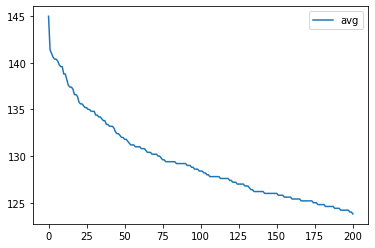

In [12]:
combo_df.sort_values(by='avg', ascending=False).reset_index().loc[0:200, ['avg']].plot()

## Five Driver + Car Combos

<AxesSubplot:>

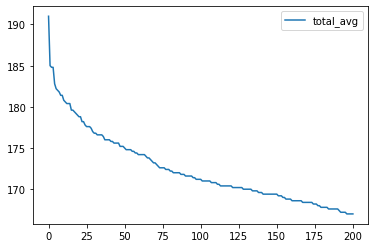

In [13]:
all_combo_b.sort_values(by='total_avg', ascending=False).reset_index().loc[0:200, ['total_avg']].plot()

In [14]:
all_combo_b[all_combo_b['last_name'].str.contains('Verstappen')].head(50)

,index,last_name,diff_price,Current Price,avg,Team,BAH,SAU,AUS,ITA,...,pts_price,pts_price_med,Unnamed: 0,Current Price_car,Season Start PriceSeason Price,Points/Million,diff_price_car,total_diff_price,total_price,total_avg
1,1213,VerstappenLeclercOconBottasMagnussen,36.712668,77.1,127.2,Ferrari,76,63,44,30,...,36.515689,39.800838,2,25.8,25.0,2.24,10.715689,47.428357,102.9,185.0
15,2623,VerstappenLeclercBottasAlbonMagnussen,36.880998,72.1,121.8,Ferrari,76,63,44,30,...,36.515689,39.800838,2,25.8,25.0,2.24,10.715689,47.596687,97.9,179.6
16,2633,VerstappenLeclercBottasStrollMagnussen,35.380998,73.6,121.8,Ferrari,76,63,44,30,...,36.515689,39.800838,2,25.8,25.0,2.24,10.715689,46.096687,99.4,179.6
20,2913,VerstappenLeclercOconAlbonMagnussen,33.165195,75.1,121.0,Ferrari,76,63,44,30,...,36.515689,39.800838,2,25.8,25.0,2.24,10.715689,43.880884,100.9,178.8
21,2943,VerstappenLeclercOconStrollMagnussen,31.665195,76.6,121.0,Ferrari,76,63,44,30,...,36.515689,39.800838,2,25.8,25.0,2.24,10.715689,42.380884,102.4,178.8
23,3093,VerstappenLeclercBottasStrollAlbon,32.828343,74.9,120.4,Ferrari,76,63,44,30,...,36.515689,39.800838,2,25.8,25.0,2.24,10.715689,43.544032,100.7,178.2
46,4143,VerstappenLeclercTsunodaBottasMagnussen,32.401983,73.0,117.8,Ferrari,76,63,44,30,...,36.515689,39.800838,2,25.8,25.0,2.24,10.715689,43.117673,98.8,175.6
54,4533,VerstappenLeclercTsunodaOconMagnussen,28.68618,76.0,117.0,Ferrari,76,63,44,30,...,36.515689,39.800838,2,25.8,25.0,2.24,10.715689,39.40187,101.8,174.8
60,4813,VerstappenLeclercTsunodaBottasAlbon,29.849328,74.3,116.4,Ferrari,76,63,44,30,...,36.515689,39.800838,2,25.8,25.0,2.24,10.715689,40.565017,100.1,174.2
61,4823,VerstappenLeclercTsunodaBottasStroll,28.349328,75.8,116.4,Ferrari,76,63,44,30,...,36.515689,39.800838,2,25.8,25.0,2.24,10.715689,39.065017,101.6,174.2
